# Lab 05 - Data Visualization I

Name: Jake Schaeffer  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2020  
Instructor: Brian King

matplotlib and seaborn documentation used as a reference for most(if not all) exercises

In [143]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
print("np version:",np.__version__)
print("pd version:",pd.__version__)
print("mpl version:",mpl.__version__)
print("sns version:",sns.__version__)

np version: 1.17.4
pd version: 0.25.3
mpl version: 3.1.1
sns version: 0.9.0


### 1) [M] Read https://matplotlib.org/tutorials/introductory/usage.html only up to the section titled Backends.
(NOTE: at the end, you will read about a Jupyter widget library called ipympl. Do NOT install this! Skip these
instructions!) Then, summarize the following important parts of a plot:  
a. Figure  
b. Axes  
c. Axis  
d. Artist  
Click on the following: https://matplotlib.org/tutorials/index.html#introductory . Then, click on Pyplot
tutorial. This page has good, basic examples to help you get going for the rest of the material

a.  Figure is a picture containing axes, labels, lines, tick marks, a title, legend, and whatever else. The figure's canvas contains the graph itself.  
b. The axes are the actual plot. This has both the axis objects (eg x and y)  
c. axis are the actual line objects that show the domain and range. they have tick marks and labels.  
d. artist is all that is visible. all artists are on the canvas and are likely in the axes object.

### 2) [P] Set the seed of numpy's RNG to 10 with the following:
np.random.seed(10)

In [144]:
np.random.seed(10)

### 3) [P] Create a dataframe named df_uniform that contains 1000 observations. It should have two variables,
named x and y. For each observation, x should be generated from a uniform distribution between 10 and 90,
and y should be generated from a uniform between 20 and 80. Show the head() of the dataframe.

In [145]:
x = np.random.uniform(10,90,1000)
y = np.random.uniform(20,80,1000)

df_uniform = pd.DataFrame({"x":x,"y":y})
df_uniform.head()

,x,y
0,71.705651,40.899795
1,11.660156,68.537772
2,60.691859,47.578231
3,69.904311,57.567458
4,49.880561,32.218810


### 4) [M] What is a scatterplot? What does it show? What type of data is it used for? Is it good for one variable, or more?

A scatterplot is a collection of points(coordinates) that shows the relationship between multiple variables. Usually it is used with numeric data. It typically will compare two variables, but could be used with three.

### 5) [P] Generate a scatterplot of the data using matplotlib's scatter method. The tutorial and examples for matplotlib have plenty of examples that are very close to what you need. Your plot must:
a. Have a title  
b. Label both axes with "x" and "y" respectively  
c. Change the x and y axis to display between 0 and 100  
d. Change the default point size  
e. Change the default color of the point  
f. Display a grid  
Here is one possible example:

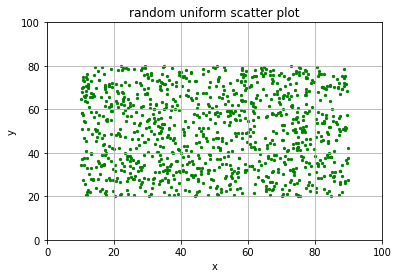

In [146]:
plt.scatter(df_uniform.x,df_uniform.y,s = 5, c = "green")
plt.title("random uniform scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)
plt.show()

### 6) [P] Generate a data frame called df_normal with 1000 observations, two variables names x and y again. 
This
time, x should be generated from a normal distribution with mean 50 and standard deviation 15, and y with
mean 50 and standard deviation 5. Again, show the head() of df_normal.

In [147]:
x = np.random.normal(50,15,1000)
y = np.random.normal(50,5,1000)

df_normal = pd.DataFrame({"x":x,"y":y})
df_normal.head()

,x,y
0,71.182357,49.123879
1,56.954296,54.579597
2,30.306787,47.688809
3,53.658082,50.707723
4,71.580015,51.934152


### 7) [P] Repeat your scatterplot above with df_normal . Use a different color point, and title your plot accordingly.

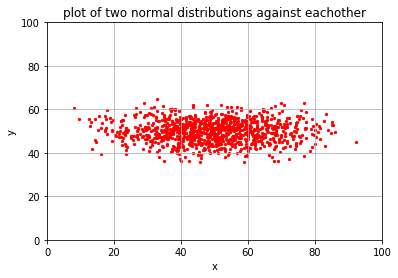

In [148]:
plt.scatter(df_normal.x,df_normal.y,s = 5, c = "red")
plt.title("plot of two normal distributions against eachother")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)
plt.show()

### 8) [P] Generate a single figure that contains two axes that are adjacent to each other. You should have:
a. at least one shared axis  
b. appropriate axis labels  
c. make the range of the axis on both plots the same  
d. display a legend on each to be sure both are labeled correctly as "normal" or "uniform"  
e. One title at the top  

Text(0.5, 0, 'x')

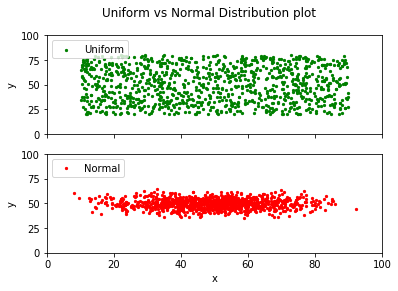

In [149]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle("Uniform vs Normal Distribution plot")
plt.setp(axs, xlim=(0,100), ylim=(0,100),ylabel = "y")
axs[0].scatter(df_uniform.x,df_uniform.y,s = 5, c= "green")
axs[1].scatter(df_normal.x,df_normal.y,s = 5, c= "red")
axs[0].legend(["Uniform"], loc = 2)
axs[1].legend(["Normal"], loc = 2)
plt.xlabel("x") # this is not in setp because we only want it on the bottom

### 9) [P] Display both df_uniform and df_normal on one shared plot, with an appropriate legend
As you might surmise, there are an enormous number of other types of plots you can use to understand your data.
Matplotlib is quite impressive, and gives you great control for creating publication quality graphs. However, its
interface is complex.
During our EDA phase, we often just want quick ways to explore our data and understand our distributions.
Fortunately, pandas has a nice interface to matplotlib that makes it quite easy to generate some quick plots. We
will look at those next.

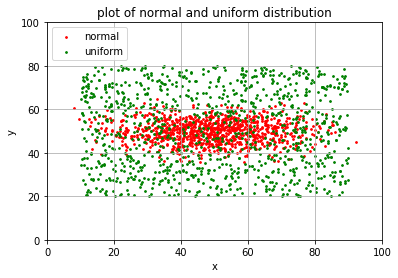

In [150]:
plt.scatter(df_normal.x,df_normal.y,s = 3, c = "red")
plt.scatter(df_uniform.x,df_uniform.y,s = 3, c = "green")
plt.title("plot of normal and uniform distribution")
plt.legend(["normal","uniform"],loc = 2)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)
plt.show()

### 10) [M] What is a histogram? In your answer, in addition to defining it, please clearly indicate what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

Is way of displaying data with bars of varying height. A histogram is very useful for categorizing numbers into set ranges("binning"). It is best used with one variable to show it's frequency in different ranges.

[ref](https://www.khanacademy.org/math/ap-statistics/quantitative-data-ap/histograms-stem-leaf/v/histograms-intro)

### 11) [P] The pandas DataFrame class has a useful interface to matplotlib that will help you generate some quick plots as you explore your data. To get you started, generate a histogram of both the x and y variables for df_uniform. Use 30 bins, and set the range of both variables to be 0 – 100. Repeat this exercise on df_normal. (HINT:Use the hist() method of DataFrame.)

[Text(0, 0.5, 'freq'), 0, 100, Text(0, 0.5, 'freq'), 0, 100]

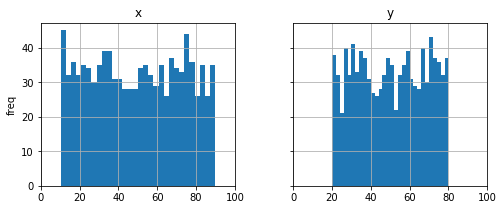

In [151]:
hist = df_uniform.hist(bins = 30, sharey = True, figsize = (8,3))
plt.setp(hist, xlim=(0,100), ylabel = "freq")

### 12) [M] What is a quantile?

A quantile is a portion of a data set that contains an equal amount of data as every other quantile, for instance, if there are 12 quantiles, each contains 1/12 of the data. In addition, the ith quantile contains the data that is the 1/12 that is lower than the 1 - i/12 part of the data that is larger.

ref: https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/quantile.htm

### 13) [M] In terms of quantiles, what is a quartile? What about a percentile? What is an Inter-quartile range (IQR)?

a quartile is just a quantile that is a fourth. a percentile is a quantile that is a 100th. IQR is the middle 50% of the data. it is the 2nd and 3rd quartile.

ref: https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-spread-quantitative/v/calculating-interquartile-range-iqr

### 14) [M, P] Read about the quantile() method for data frames, and use it to numerically show the 25th, median, and 75th percentiles, and compute the IQR (Inter-quartile range) for both variables, on both data frames. Compare and contrast.

In [152]:
print("Normal:")
normalQuants = df_normal.quantile([.25,.5,.75])
normIQR = pd.DataFrame({"IQR":df_normal.quantile(.75)-df_normal.quantile(.25)})
print(normalQuants.append(normIQR.T))
print()
print("Uniform:")
uniQuants = df_uniform.quantile([.25,.5,.75])
uniIQR = pd.DataFrame({"IQR":df_uniform.quantile(.75)-df_uniform.quantile(.25)})
print(uniQuants.append(uniIQR.T))

Normal:
              x          y
0.25  39.377233  46.483046
0.5   49.280199  50.100092
0.75  59.737851  53.414954
IQR   20.360617   6.931908

Uniform:
              x          y
0.25  29.101179  34.537015
0.5   49.646841  50.428786
0.75  70.362502  66.256670
IQR   41.261323  31.719655


The uniform distribution has a larger IQR than the normal (normal-concentrated in center).  
The normal y has the smallest IQR (normal with relatively low std dev).  
All have a similar 50th percentile (same mean).  
The 75th and 25th percentile are relatively higher/lower (respectively) in the uniform than normal. (normal concentrated at center)

### 15) [M] There are many ways to define what we mean by an outlier. A very common technique is known as the IQR rule for outliers. What is a definition of an outlier in terms of IQR? (Your answer should use 1.5 * IQR .)

An outlier is a value where:  

value > 75th percentile + 1.5 * IQR  
or  
value < 25th percentile - 1.5 * IQR


ref:https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

### 16) [P] Write a function called IQR_outlier_limits that takes a dataframe as input, and computes the minimum and maximum outlier thresholds for each variable (numeric only assumed), stored in a data frame that is returned as a result.

(The results will depend on the actual distribution of your random data. However, the results should make
sense! Verify your results to ensure that you have some observations that are outliers. Your normal data
should have some. Your uniform data should not.)

In [153]:
def IQR_outlier_limits(df):
    xQ1 = df.quantile(.25)[0] #x .25
    yQ1 = df.quantile(.25)[1] #y .25
    xQ3 = df.quantile(.75)[0] #x .75
    yQ3 = df.quantile(.75)[1] #y .75
    
    xMaxLim = xQ3 + (xQ3-xQ1)*1.5
    xMinLim = xQ1 - (xQ3-xQ1)*1.5
    yMaxLim = yQ3 + (yQ3-yQ1)*1.5
    yMinLim = yQ1 - (yQ3-yQ1)*1.5
    
    return pd.DataFrame(np.array([[xMaxLim,yMaxLim], [xMinLim,yMinLim]]), columns=['x', 'y'],index = ["max","min"])

limUniform = IQR_outlier_limits(df_uniform)

limNormal = IQR_outlier_limits(df_normal)

print("uniform: \n",limUniform)
print()
print("normal: \n",limNormal)

print("uniform outlier count:\n")
print(df_uniform.where(df_uniform > limUniform.loc["max"]).count() + df_uniform.where(df_uniform < limUniform.loc["min"]).count())
print()
print("normal outlier count:\n")
print(df_normal.where(df_normal > limNormal.loc["max"]).count() + df_normal.where(df_normal < limNormal.loc["min"]).count())

uniform: 
               x           y
max  132.254487  113.836153
min  -32.790805  -13.042468

normal: 
              x          y
max  90.278777  63.812816
min   8.836307  36.085185
uniform outlier count:

x    0
y    0
dtype: int64

normal outlier count:

x    3
y    3
dtype: int64


### 17) Use your function you defined above to determine the outliers for df_normal and df_uniform, if any.
(HINT: You should get at least a few outliers for df_normal)

In [154]:
limUniform = IQR_outlier_limits(df_uniform)
minUniform = df_uniform.where(df_uniform < limUniform.loc["min"]).dropna(how = "all")
maxUniform = df_uniform.where(df_uniform > limUniform.loc["max"]).dropna(how = "all")
uniformOutlier = minUniform.append(maxUniform)

limNormal = IQR_outlier_limits(df_normal)
minNormal = df_normal.where(df_normal < limNormal.loc["min"]).dropna(how = "all")
maxNormal = df_normal.where(df_normal > limNormal.loc["max"]).dropna(how = "all")
normalOutlier = minNormal.append(maxNormal)

print("uniform outliers: ")
print(uniformOutlier)

print("normal outliers: ")
print(normalOutlier)

uniform outliers: 
Empty DataFrame
Columns: [x, y]
Index: []
normal outliers: 
              x          y
41          NaN  35.688092
119         NaN  35.852661
969    7.917264        NaN
630  104.137411        NaN
758         NaN  64.735494
844   92.292830        NaN


### 18) [M] What is a box plot? (A.k.a boxplot, box-and-whisker plot). In your answer, please clearly indicate what it is, what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

A box plot uses the 5-number summary (min,Q1,median,Q3,max) to create a visual of the distibution of a data set. It is really only good for seeing the distribution of a single numeric variable. A box plot is a great way to visualize the skew of a data set. Thus they can be handy for comparing the skew of multiple variables.

ref: https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm

### 19) [P] Again, use the DataFrame plotting interface to generate a box plot on both x and y variables of both df_uniform and df_normal.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6bcd8f508>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6bcd86e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6bcd8f748>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6bcd033c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6bc6021c8>],
 'means': []}

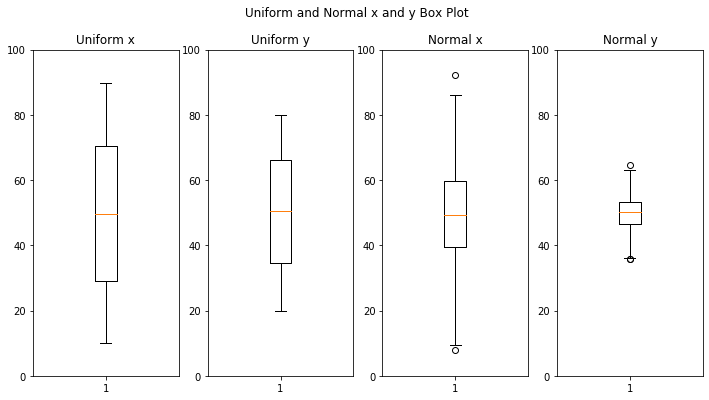

In [155]:
fig, axs = plt.subplots(1,4,figsize = (12,6),)
fig.suptitle("Uniform and Normal x and y Box Plot")
plt.setp(axs,ylim = (0,100))
axs[0].set_title("Uniform x")
axs[1].set_title("Uniform y")
axs[2].set_title("Normal x")
axs[3].set_title("Normal y")
axs[0].boxplot(df_uniform["x"])
axs[1].boxplot(df_uniform["y"])
axs[2].boxplot(df_normal["x"])
axs[3].boxplot(df_normal["y"])

### 20) [M] From your understanding of a box plot, summarize the distribution of these data, comparing the uniform and the normal distributed data. You should be using the correct terminology, meaning, interpreting the box plot results in terms of quartiles, outliers, etc.

We can see that uniform x had a wider distribution than y. While normal x has the largest distribution. Only the normal distributions have outliers. The normal y is much more condensed, with its middle 50% of values seeming to be  between 45 and 55. The largest quartiles are those from normal x, likely due to its high standard deviation. Uniform x is just like uniform y except more spread out. All distributions still have a mean around 50.

### 21) [M] What is a density plot? In your answer, please clearly indicate what it is, the type of data you use it for, and whether it's good for one variable or to show relationships between multiple variables.

A density plots data by frequency of value. This is used for visualizing the frequency of data over it's range.. It is used for a single numeric variable typically. Putting multiple variables into one plot would be useful for comparing the two variable's distributions.

ref: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

### 22) [P] Generate a density plot for both x and y variables of both df_uniform and df_normal.

uniform then normal


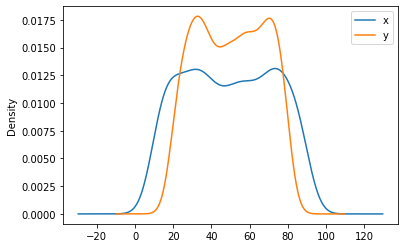

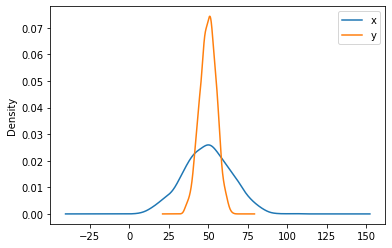

In [156]:
print("uniform then normal")
df_uniform.plot.density()
df_normal.plot.density()

### 23) [M] Interpret the density plot results

We can see that the y normal plot is concentrated within a very small range and has highger frequency closer to the mean. the x normal is not as densely concentrated but still looks relatively normal. the uniform variables both have a fairly uniform distribution, but seem to have a higher distribution before they drop off on either edge. Perhaps this is due to the smoothing that the density plot does. The x uniform has a wider range than the y normal.

### 24) [P] Go back to the describe() method you learn about in previous labs. Show the results of describe() for both data frames. This stills you much information about the distribution of the data.

In [157]:
print("uniform")
print(df_uniform.describe())
print()
print("normal")
print(df_normal.describe())

uniform
                 x            y
count  1000.000000  1000.000000
mean     49.360418    50.311108
std      23.361352    17.612472
min      10.140772    20.018029
25%      29.101179    34.537015
50%      49.646841    50.428786
75%      70.362502    66.256670
max      89.891129    79.999388

normal
                 x            y
count  1000.000000  1000.000000
mean     49.376425    49.879051
std      14.934762     5.134885
min       7.917264    35.688092
25%      39.377233    46.483046
50%      49.280199    50.100092
75%      59.737851    53.414954
max     104.137411    64.735494


### 25) [M] What is a quantile-quantile plot (Q-Q plot)? (Wikipedia provides a good answer for this one
https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot )

A Q-Q plot compares two distributions by comparing their quantiles on a 2d graph. for instance, the first point compares the value of the first quantile for one distibution against the first quantile of the other.

### 26) [P] Load the scipy.stats package as stats. Look up the API and read about the probplot function.
(See
http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.
gofplots.qqplot ) This can generate a Q-Q plot for you quite easily. Generate a Q-Q plot for a sample of 100
points from the x-variable df_uniform. Do the same for df_normal. For illustrative purposes, assume your distribution is normal for both plots (even though we know it is not!)

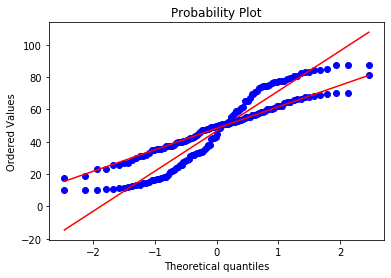

In [158]:
import scipy.stats as stats

uniform = stats.probplot(df_uniform.x[450:550],plot = plt)
normal = stats.probplot(df_normal.x[450:550],plot = plt)

### 27) [M] Compare and contrast your resulting plot. Does the output suggest that one is indeed normally distributed, and the other is not?

Yes. The shallower slope line is for df_normal and the dots basically follow a stright line, meaning that df_normal follows a normal distribution. The steeper slop line is for df_uniform and clearly strays fartger from the trend line. this shows the df_uniform is not approximately normal. The values are too high in the higher quantiles, implying that df_uniform's values are higher than the normals in the high range. vice versa is true in the lower range of quantiles.

### 28) [P] Repeat the experiment, showing a Q-Q plot for 100 samples of each dataset. However, now assume the distribution is uniform.

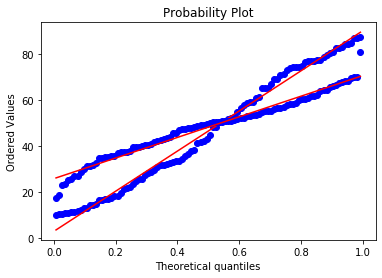

In [159]:
uniform = stats.probplot(df_uniform.x[450:550],plot = plt,dist = "uniform")
normal = stats.probplot(df_normal.x[450:550],plot = plt,dist = "uniform")

### 29) Again, compare the plots. Does the output suggest one is indeed normally distributed and the other is not?

Not really. it is hard to tell if the deviation from the trendline is just noise or is meaningful. the normal has a slightly more consistent line between points that does move away from the trendline, but it is hard to say that this is significant.

### 30) [P] Show a single scatterplot of df_normal using sns. Change the default color and point type that is used in the plot.
For the remainder of these exercises, you are required to use seaborn, but select at least two aspects of your plot
to make them unique. It could be the color of the point, size, background, grid, etc. etc. There are many choices.
Use these exercises to learn about this wonderful visualization framework, and to tap into the artist in you!

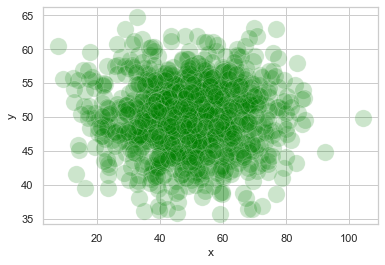

In [245]:
sns.set_style("whitegrid")
sns.scatterplot("x","y", data = df_normal,**{"color":"green","alpha":0.2,"s":300,})

### 31) [P] Show a scatterplot of both df_uniform and df_normal side by side on the same figure

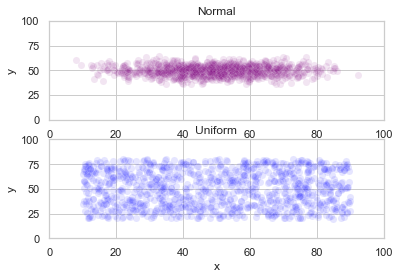

In [230]:
fig, axs = plt.subplots(2)
plt.setp(axs, xlim=(0,100), ylim=(0,100),ylabel = "y")
axs[0].set_title("Normal")
axs[1].set_title("Uniform")
sns.scatterplot("x","y", data = df_normal,ax = axs[0],**{"color":"purple","alpha":0.1,"s":50})
sns.scatterplot("x","y", data = df_uniform,ax = axs[1],**{"color":"blue","alpha":0.1,"s":50})

### 32) [P] Show the distribution of only the x variable for both df_uniform and df_normal, with a density curve and a rugplot at the bottom. (Look at sns.distplot)

uniform in yellow


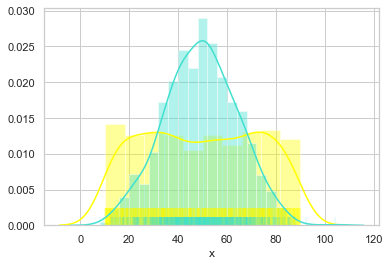

In [256]:
print("uniform in yellow")
sns.distplot(df_uniform.x, rug = True,color = "yellow",rug_kws = {"height":.08,"linewidth":.2})
sns.distplot(df_normal.x, rug = True,color = "turquoise",rug_kws = {"height":.04,"linewidth":.2})

### 33) [M] What is a jointplot in Seaborn?

Shows the relationship between two variables as well as the distributions of each variable.

### 34) [P] Use sns.jointplot to show the bivariate distribution of x and y for df_uniform and df_normal

uniform then normal


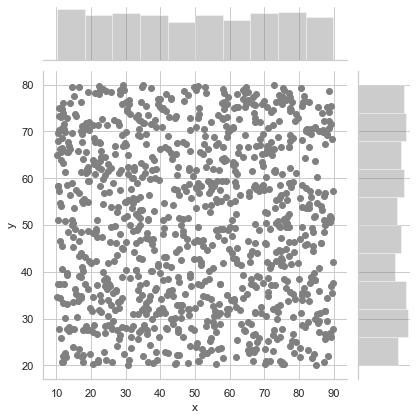

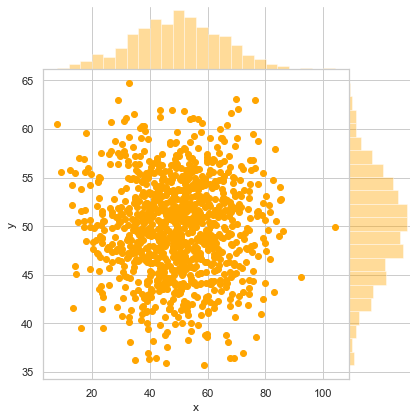

In [271]:
print("uniform then normal")
sns.jointplot(data = df_uniform,x="x",y="y",color = "grey",ratio = 5)
sns.jointplot(data = df_normal,x="x",y="y",color = "orange",space = 0)

### 35) [P] Show a hexbin plot using sns.jointplot for df_normal

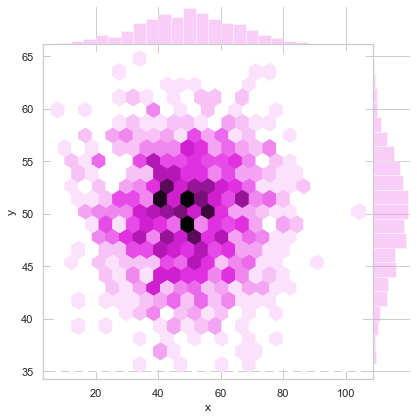

In [274]:
sns.jointplot(data = df_normal,x="x",y="y",color = "violet",space = 0,kind = "hex",ratio = 9)

Part III – Some basic data preprocessing
### 36) [P] Create an additional variable in df_uniform called x_fac1 that represents a factor with 3 levels, "X1","X2", and "X3". You should discretize according to equal width bins over the distribution of x. (Divide the range of x into three.)

In [291]:
df_uniform.insert(2,"x_fac1",pd.cut(df_uniform.x, 3,labels = ["X1","X2","X3"]))
df_uniform.head()

,x,y,x_fac1
0,71.705651,40.899795,X3
1,11.660156,68.537772,X1
2,60.691859,47.578231,X2
3,69.904311,57.567458,X3
4,49.880561,32.218810,X2


### 37) [P] Create an additional variable in df_uniform called x_fac2 that represents a factor with 3 levels, "X1", "X2", and "X3". This time, you should discretize using equal depth bins over the distribution of x. Select your division criteria such that there are an equal number of data in each bin. Verify that the distribution of your data each has the same number of data (within 1).

In [292]:
df_uniform.insert(3,"x_fac2",pd.qcut(df_uniform.x, 3,labels = ["X1","X2","X3"]))
df_uniform.head()

,x,y,x_fac1,x_fac2
0,71.705651,40.899795,X3,X3
1,11.660156,68.537772,X1,X1
2,60.691859,47.578231,X2,X2
3,69.904311,57.567458,X3,X3
4,49.880561,32.218810,X2,X2


### 38) [P] Create a side by side scatter plot showing the distribution of df_uniform, using x_fac1 as the color for one plot, and x_fac2 as the color for your other plot.

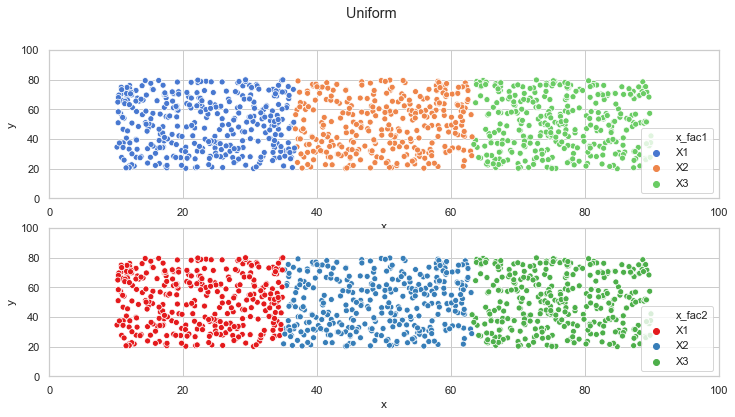

In [323]:
fig, axs = plt.subplots(2,figsize = (12,6))
fig.suptitle("Uniform ")
plt.setp(axs,ylim = (0,100),xlim = (0,100))
sns.color_palette("hls", 8)
sns.scatterplot("x","y",palette = "muted", data = df_uniform,hue = df_uniform.x_fac1, ax  = axs[0])
sns.scatterplot("x","y", palette = "Set1",data = df_uniform,hue = df_uniform.x_fac2, ax  = axs[1])